In [39]:
import yfinance as yf

# เลือกหุ้นไทย เช่น AOT.BK (Airports of Thailand)
symbol = "GULF.BK"
ticker = yf.Ticker(symbol)

# ดึงข้อมูลพื้นฐาน
info = ticker.info

# แสดงข้อมูลสำคัญ
print(f"🔎 ข้อมูลหุ้น {info.get('longName')}")
print(f"Symbol: {info.get('symbol')}")
print(f"Exchange: {info.get('exchange')}")
print(f"Last Price: {info.get('regularMarketPrice')}")
print(f"Day High: {info.get('dayHigh')}")
print(f"Day Low: {info.get('dayLow')}")
print(f"Change: {info.get('regularMarketChange')} ({info.get('regularMarketChangePercent')}%)")
print(f"Volume: {info.get('volume')}")
print(f"EPS: {info.get('trailingEps')}")
print(f"P/E Ratio: {info.get('trailingPE')}")
print(f"Dividend Yield: {info.get('dividendYield')}")
print(f"Implied Volatility: {info.get('impliedVolatility')}")


🔎 ข้อมูลหุ้น Gulf Energy Development Public Company Limited
Symbol: GULF.BK
Exchange: SET
Last Price: 48.25
Day High: 49.75
Day Low: 47.5
Change: -0.75 (-1.5306122%)
Volume: 30429015
EPS: 1.55
P/E Ratio: 31.129034
Dividend Yield: 2.06
Implied Volatility: None


In [40]:
import yfinance as yf
import pandas as pd

# ดึงข้อมูลหุ้นรายตัว
stock = yf.Ticker("AOT.BK")

# ดึงข้อมูลพื้นฐานของหุ้น
fundamental_data = stock.info

# แสดงข้อมูลพื้นฐาน
print("ข้อมูลพื้นฐานของหุ้น:")
print(fundamental_data)

# สร้าง DataFrame จากข้อมูลที่เลือก
fundamental_df = pd.DataFrame({
    "Metric": ["PE Ratio", "Market Cap", "EPS", "Beta", "Dividend Yield"],
    "Value": [
        fundamental_data.get("trailingPE", "N/A"),
        fundamental_data.get("marketCap", "N/A"),
        fundamental_data.get("epsTrailingTwelveMonths", "N/A"),
        fundamental_data.get("beta", "N/A"),
        fundamental_data.get("dividendYield", "N/A")
    ]
})

# เรียงลำดับข้อมูลตาม Metric
fundamental_df = fundamental_df.sort_values(by="Metric")

# แสดง DataFrame ที่เรียงลำดับแล้ว
print("\nDataFrame ที่เรียงลำดับแล้ว:")
print(fundamental_df)


ข้อมูลพื้นฐานของหุ้น:
{'address1': 'No. 333, Cherdwutagard Road', 'address2': 'Srikan Don Mueang', 'city': 'Bangkok', 'zip': '10210', 'country': 'Thailand', 'phone': '66 2 535 1111', 'fax': '66 2 531 5559', 'website': 'https://www.airportthai.co.th', 'industry': 'Airports & Air Services', 'industryKey': 'airports-air-services', 'industryDisp': 'Airports & Air Services', 'sector': 'Industrials', 'sectorKey': 'industrials', 'sectorDisp': 'Industrials', 'longBusinessSummary': 'Airports of Thailand Public Company Limited, together with its subsidiaries, engages in the airport business in Thailand. The company operates through Airport Management Business, Hotel Business, Ground Aviation Services, Security Business, and Project on Perishable Goods Business segments. It operates six international airports, including Suvarnabhumi Airport, Don Mueang International Airport, Chiang Mai International Airport, Hat Yai International Airport, Phuket International Airport and Mae Fah Luang - Chiang Ra

In [41]:
import yfinance as yf
import pandas as pd
from sqlalchemy import create_engine
import yfinance as yf
import psycopg2
from datetime import datetime

In [47]:
conn= psycopg2.connect(
        dbname="yfinance_fun",
    user="postgres",
    password="admin",
    host="localhost",
    port="5432"

)
cursor = conn.cursor()

In [43]:

# ดึงข้อมูลหุ้น AOT.BK
stock = yf.Ticker("PTT.BK")
fundamental_data = stock.info

# สร้าง DataFrame
fundamental_df = pd.DataFrame({
    "Metric": ["PE Ratio", "Market Cap", "EPS", "Beta", "Dividend Yield"],
    "Value": [
        fundamental_data.get("trailingPE", "N/A"),
        fundamental_data.get("marketCap", "N/A"),
        fundamental_data.get("epsTrailingTwelveMonths", "N/A"),
        fundamental_data.get("beta", "N/A"),
        fundamental_data.get("dividendYield", "N/A")
    ]
})
print(fundamental_df)

           Metric         Value
0        PE Ratio  9.841269e+00
1      Market Cap  8.854530e+11
2             EPS  3.150000e+00
3            Beta  7.680000e-01
4  Dividend Yield  8.250000e+00


In [44]:
symbol = "AOT"
stock = yf.Ticker(symbol)
fundamental_data = stock.info

# บันทึกข้อมูลบริษัท
company_info_query = """
INSERT INTO company_info (
    symbol, company_name, sector, industry, address1, address2, city, zip, country, phone, fax, website, 
    long_business_summary, market_cap, total_revenue, net_income, created_at
) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
ON CONFLICT (symbol) DO UPDATE SET 
    market_cap = EXCLUDED.market_cap, 
    total_revenue = EXCLUDED.total_revenue, 
    net_income = EXCLUDED.net_income;
"""

company_values = (
    symbol,
    fundamental_data.get("longName"),
    fundamental_data.get("sector"),
    fundamental_data.get("industry"),
    fundamental_data.get("address1"),
    fundamental_data.get("address2"),
    fundamental_data.get("city"),
    fundamental_data.get("zip"),
    fundamental_data.get("country"),
    fundamental_data.get("phone"),
    fundamental_data.get("fax"),
    fundamental_data.get("website"),
    fundamental_data.get("longBusinessSummary"),
    fundamental_data.get("marketCap"),
    fundamental_data.get("totalRevenue"),
    fundamental_data.get("netIncomeToCommon"),
    datetime.now()
)

cursor.execute(company_info_query, company_values)

# บันทึกข้อมูลพื้นฐานของหุ้น
fundamental_metrics = [
    ("PE Ratio", fundamental_data.get("trailingPE", "N/A")),
    ("Market Cap", fundamental_data.get("marketCap", "N/A")),
    ("EPS", fundamental_data.get("epsTrailingTwelveMonths", "N/A")),
    ("Beta", fundamental_data.get("beta", "N/A")),
    ("Dividend Yield", fundamental_data.get("dividendYield", "N/A"))
]

fundamental_query = """
INSERT INTO stock_fundamentals (symbol, metric, value, created_at) VALUES (%s, %s, %s, %s)
"""

for metric, value in fundamental_metrics:
    cursor.execute(fundamental_query, (symbol, metric, str(value), datetime.now()))

# บันทึกข้อมูลผู้บริหาร
officers = fundamental_data.get("companyOfficers", [])
officer_query = """
INSERT INTO company_officers (
    symbol, name, age, title, fiscal_year, total_pay, exercised_value, unexercised_value, created_at
) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

for officer in officers:
    cursor.execute(officer_query, (
        symbol,
        officer.get("name"),
        officer.get("age"),
        officer.get("title"),
        officer.get("fiscalYear"),
        officer.get("totalPay", 0),
        officer.get("exercisedValue", 0),
        officer.get("unexercisedValue", 0),
        datetime.now()
    ))



print("✅ ข้อมูลถูกบันทึกลงใน PostgreSQL เรียบร้อยแล้ว!")


✅ ข้อมูลถูกบันทึกลงใน PostgreSQL เรียบร้อยแล้ว!


In [ ]:
# 📥 โหลดรายชื่อหุ้นจาก CSV
try:
    symbols_df = pd.read_csv("thai_stocks_updated.csv")
    symbols = symbols_df['symbol'].dropna().tolist()
except FileNotFoundError:
    print("❌ ไม่พบไฟล์ 'thai_stocks.csv'")
    exit()

for symbol in symbols:
    try:
        stock = yf.Ticker(symbol)
        fundamental_data = stock.info

        # ✅ ตรวจสอบว่ามีข้อมูลหรือไม่
        if not fundamental_data or fundamental_data is None or "longName" not in fundamental_data:
            print(f"⚠️ ไม่มีข้อมูลของ {symbol} บน Yahoo Finance")
            continue

        with conn.cursor() as cursor:
            # บันทึกข้อมูลบริษัท
            company_info_query = """
            INSERT INTO company_info (
                symbol, company_name, sector, industry, address1, address2, city, zip, country, phone, fax, website, 
                long_business_summary, market_cap, total_revenue, net_income, created_at
            ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
            ON CONFLICT (symbol) DO UPDATE SET 
                market_cap = EXCLUDED.market_cap, 
                total_revenue = EXCLUDED.total_revenue, 
                net_income = EXCLUDED.net_income;
            """

            company_values = (
                symbol,
                fundamental_data.get("longName"),
                fundamental_data.get("sector"),
                fundamental_data.get("industry"),
                fundamental_data.get("address1"),
                fundamental_data.get("address2"),
                fundamental_data.get("city"),
                fundamental_data.get("zip"),
                fundamental_data.get("country"),
                fundamental_data.get("phone"),
                fundamental_data.get("fax"),
                fundamental_data.get("website"),
                fundamental_data.get("longBusinessSummary"),
                fundamental_data.get("marketCap"),
                fundamental_data.get("totalRevenue"),
                fundamental_data.get("netIncomeToCommon"),
                datetime.now()
            )

            cursor.execute(company_info_query, company_values)

            # บันทึกข้อมูลพื้นฐานของหุ้น
            fundamental_metrics = [
                ("PE Ratio", fundamental_data.get("trailingPE", "N/A")),
                ("Market Cap", fundamental_data.get("marketCap", "N/A")),
                ("EPS", fundamental_data.get("epsTrailingTwelveMonths", "N/A")),
                ("Beta", fundamental_data.get("beta", "N/A")),
                ("Dividend Yield", fundamental_data.get("dividendYield", "N/A"))
            ]

            fundamental_query = """
            INSERT INTO stock_fundamentals (symbol, metric, value, created_at) VALUES (%s, %s, %s, %s)
            """

            for metric, value in fundamental_metrics:
                cursor.execute(fundamental_query, (symbol, metric, str(value), datetime.now()))

            # บันทึกข้อมูลผู้บริหาร
            officers = fundamental_data.get("companyOfficers", [])
            officer_query = """
            INSERT INTO company_officers (
                symbol, name, age, title, fiscal_year, total_pay, exercised_value, unexercised_value, created_at
            ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
            """

            for officer in officers:
                cursor.execute(officer_query, (
                    symbol,
                    officer.get("name"),
                    officer.get("age"),
                    officer.get("title"),
                    officer.get("fiscalYear"),
                    officer.get("totalPay", 0),
                    officer.get("exercisedValue", 0),
                    officer.get("unexercisedValue", 0),
                    datetime.now()
                ))

        conn.commit()  # ✅ Commit หลังจากหุ้นแต่ละตัวเสร็จสิ้น
        print(f"✅ ข้อมูลของ {symbol} ถูกบันทึกเรียบร้อยแล้ว!")

    except Exception as e:
        print(f"❌ เกิดข้อผิดพลาดในการดึงข้อมูลของ {symbol}: {e}")
        continue

print("🎉 ข้อมูลหุ้นทั้งหมดถูกบันทึกลงใน PostgreSQL เรียบร้อยแล้ว!")


✅ ข้อมูลของ 24CS.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ 2S.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ 3BBIF.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ A.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ A5.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ AAI.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ AAV.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ ABM.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ ACAP.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ ACC.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ ACE.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ ACG.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ ADB.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ ADD.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ ADVANC.BK ถูกบันทึกเรียบร้อยแล้ว!
⚠️ ไม่มีข้อมูลของ ADVICE.BK บน Yahoo Finance
✅ ข้อมูลของ AE.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ AEONTS.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ AF.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ AFC.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ AGE.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ AH.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ AHC.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อม

401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SCAP.BK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SCAP.BK&crumb=Edge%3A+Too+Many+Requests


❌ เกิดข้อผิดพลาดในการดึงข้อมูลของ SCAP.BK: 'NoneType' object has no attribute 'update'
✅ ข้อมูลของ SCB.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ SCC.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ SCCC.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ SCG.BK ถูกบันทึกเรียบร้อยแล้ว!
⚠️ ไม่มีข้อมูลของ SCGD.BK บน Yahoo Finance
✅ ข้อมูลของ SCGP.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ SCI.BK ถูกบันทึกเรียบร้อยแล้ว!
⚠️ ไม่มีข้อมูลของ SCL.BK บน Yahoo Finance
✅ ข้อมูลของ SCM.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ SCN.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ SCP.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ SDC.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ SE.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ SEAFCO.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ SEAOIL.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ SECURE.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ SE-ED.BK ถูกบันทึกเรียบร้อยแล้ว!
⚠️ ไม่มีข้อมูลของ SEI.BK บน Yahoo Finance
✅ ข้อมูลของ SELIC.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ SENA.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ SENX.BK ถูกบันทึกเรียบร้อยแล

401 Client Error: Unauthorized for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/UAC.BK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=UAC.BK&crumb=Edge%3A+Too+Many+Requests


❌ เกิดข้อผิดพลาดในการดึงข้อมูลของ UAC.BK: 'NoneType' object has no attribute 'update'
✅ ข้อมูลของ UBA.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ UBE.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ UBIS.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ UEC.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ UKEM.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ UMI.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ UMS.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ UNIQ.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ UOBKH.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ UP.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ UPF.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ UPOIC.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ UREKA.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ UTP.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ UV.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ UVAN.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ VARO.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ VCOM.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ VGI.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ VIBHA.BK ถูกบันทึกเรียบร้อยแล้ว!
✅ ข้อมูลของ VIH.BK ถูกบันทึกเรียบร้อยแล้ว!

In [51]:
# Query ข้อมูลจากตาราง stock_fundamentals
query = "SELECT * FROM public.stock_fundamentals;"

# ดึงข้อมูลเป็น DataFrame
df_db = pd.read_sql(query, conn)
print(df_db.head()) 

   id  symbol          metric         value                 created_at
0   1  AOT.BK        PE Ratio     30.395683 2025-03-04 03:44:37.041049
1   2  AOT.BK      Market Cap  603570831360 2025-03-04 03:44:37.042159
2   3  AOT.BK             EPS          1.39 2025-03-04 03:44:37.042159
3   4  AOT.BK            Beta          0.36 2025-03-04 03:44:37.042159
4   5  AOT.BK  Dividend Yield          1.83 2025-03-04 03:44:37.042159


C:\Users\Admin\AppData\Local\Temp\ipykernel_21480\1382985433.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_db = pd.read_sql(query, conn)


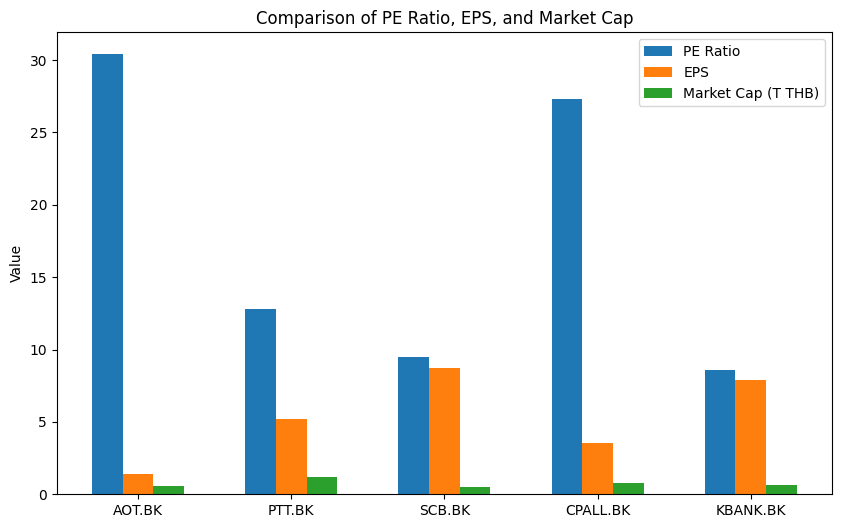

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# ตัวอย่างข้อมูลหุ้น (สมมติว่าข้อมูลดึงมาจากฐานข้อมูลแล้ว)
data = {
    "symbol": ["AOT.BK", "PTT.BK", "SCB.BK", "CPALL.BK", "KBANK.BK"],
    "PE Ratio": [30.4, 12.8, 9.5, 27.3, 8.6],
    "EPS": [1.39, 5.22, 8.75, 3.55, 7.89],
    "Market Cap": [603570831360, 1200000000000, 500000000000, 750000000000, 620000000000],
}

df_viz = pd.DataFrame(data)

# สร้างกราฟแท่งเปรียบเทียบ PE Ratio / EPS / Market Cap
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  # ความกว้างของแท่ง

x = np.arange(len(df_viz["symbol"]))  # ตำแหน่งของหุ้น

# วาดกราฟแท่ง
ax.bar(x - width, df_viz["PE Ratio"], width, label="PE Ratio")
ax.bar(x, df_viz["EPS"], width, label="EPS")
ax.bar(x + width, df_viz["Market Cap"] / 1e12, width, label="Market Cap (T THB)")

# ตั้งค่ากราฟ
ax.set_xticks(x)
ax.set_xticklabels(df_viz["symbol"])
ax.set_ylabel("Value")
ax.set_title("Comparison of PE Ratio, EPS, and Market Cap")
ax.legend()

# แสดงกราฟ
plt.show()
